
# Project: Investigate a Dataset tmdb-movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#data_cleaning">Data Cleaning</a></li>   
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href='#limitations'>Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

# Dataset Description:

   #### This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
   ####  including user ratings , Budget, revenue and after inflation .


# Questions I am trying to find answers are :

#### 1- Does Movies Budget  get higher over time  after inflation ?

#### 2- Does Movies get more Revenue over time ?

#### 3- Do they make more movies every year?

#### 4- Is  budget  increase for all movies  every year  or just certain movies?

#### 5- Does Movies industry get popular over time ?


##### the steps involved to understand, clean and prepare our data for data exploration :

    1-Variable Identification
    2-Missing values
    3-Outlier 
    4-unnecessary rows

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Wrangling

In [2]:
# Load data and print out a few lines and check data types.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,46528,tt1032751,0.25054,42500000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/2010,74,6.4,2010,42500000.0,11087569.0
1,1865,tt1298650,4.95513,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|Pen������������lope Cruz|Geoffrey ...,http://disney.go.com/pirates/index-on-stranger...,Rob Marshall,Live Forever Or Die Trying.,...,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/2011,3180,6.3,2011,368371256.2,990417500.3


In [3]:
# summary report 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.459050e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.751584e+07,5.136436e+07
std,92130.136561,1.000185,3.066263e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.408355e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,3.683713e+08,2.827124e+09



   ### Variable Identification:

    identify target variable


In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#### Target variable:

    1-budget_adj            
    2-revenue_adj           
    3-release_year 
    4-genres

In [5]:
#Check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<a id="data_cleaning"></a>
# Data cleaning

In [6]:
# Convert string to dateformat
df["release_date"]=pd.to_datetime(df["release_date"])

In [7]:
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [8]:
#remove unnecessary rows for the research
df.drop(columns={"homepage","keywords","tagline","production_companies"},inplace=True)


In [9]:
#drop null values
df.dropna(inplace=True)

In [10]:
#drop duplicates rows
df.drop_duplicates()
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,46528,tt1032751,0.250540,42500000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,6.4,2010,42500000.0,1.108757e+07
1,1865,tt1298650,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|Pen������������lope Cruz|Geoffrey ...,Rob Marshall,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,2011-05-11,3180,6.3,2011,368371256.2,9.904175e+08
2,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,"Captain Barbossa, long believed to be dead, ha...",169,Adventure|Fantasy|Action,2007-05-19,2626,6.8,2007,315500574.8,1.010654e+09
3,1452,tt0348150,1.957331,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,"Set 5 years after the end of Superman II, the ...",154,Adventure|Fantasy|Action|Science Fiction,2006-06-28,834,5.3,2006,292050672.7,4.230205e+08
4,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,1997-11-18,4654,7.3,1997,271692064.2,2.506406e+09


In [11]:
# remove outliers in budget_adj and revenue_adj with 0 value
df.drop(df[(df.budget_adj <= 0) | (df.revenue_adj <= 0)].index, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 5168
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3850 non-null   int64         
 1   imdb_id         3850 non-null   object        
 2   popularity      3850 non-null   float64       
 3   budget          3850 non-null   int64         
 4   revenue         3850 non-null   int64         
 5   original_title  3850 non-null   object        
 6   cast            3850 non-null   object        
 7   director        3850 non-null   object        
 8   overview        3850 non-null   object        
 9   runtime         3850 non-null   int64         
 10  genres          3850 non-null   object        
 11  release_date    3850 non-null   datetime64[ns]
 12  vote_count      3850 non-null   int64         
 13  vote_average    3850 non-null   float64       
 14  release_year    3850 non-null   int64         
 15  budg

<a id='eda'></a>
## Exploratory Data Analysis



####  Does Movies Budget  get higher over time  after inflation ?

In [13]:
def visual_scatter_plot(df,x_var,y_var,plot_title,x_label,y_label):
    df.plot.scatter(x=x_var, y=y_var, c="blue", figsize=(10, 8))
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    

In [14]:
def visual_hist_plot(df,var,plot_title,x_label):
    df[var].plot.hist(bins=60,edgecolor="black",figsize=(14, 8))
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.show()

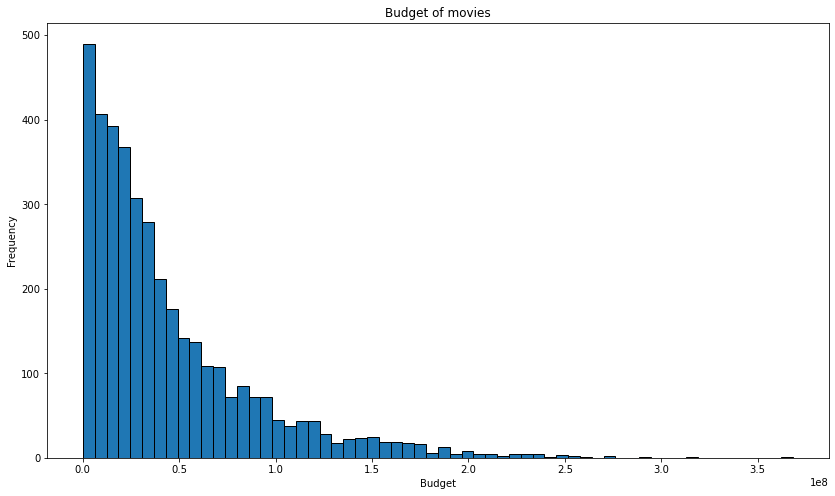

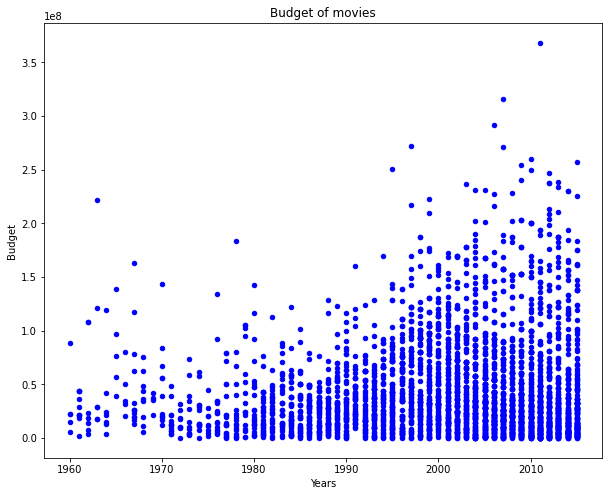

In [15]:
visual_hist_plot(df,"budget_adj","Budget of movies","Budget")
visual_scatter_plot(df,"release_year","budget_adj","Budget of movies","Years","Budget")

> There is much of difference with budget_adj,it's increasing every year as total 

### Does Movies get more Revenue over time ?

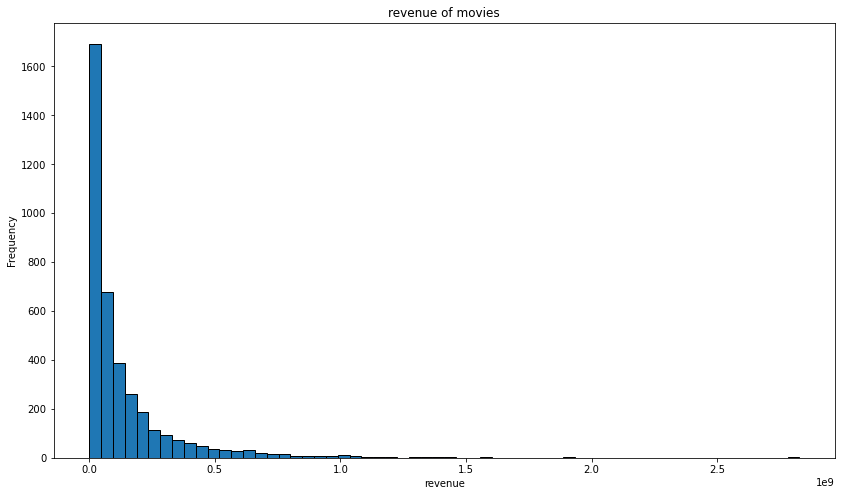

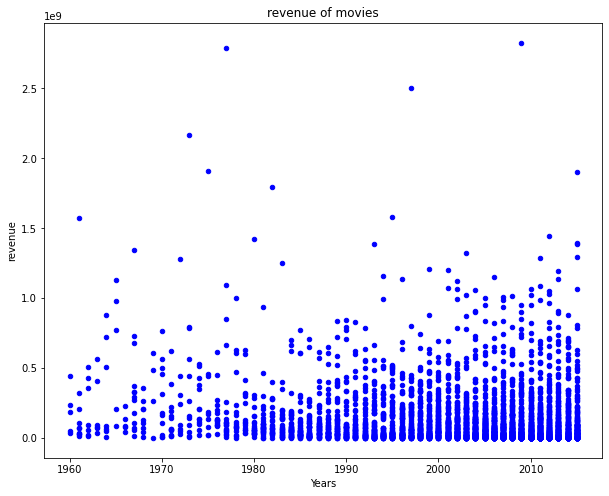

In [16]:
visual_hist_plot(df,"revenue_adj","revenue of movies","revenue")
visual_scatter_plot(df,"release_year","revenue_adj","revenue of movies","Years","revenue")

> There is much of difference with revenue,it's increasing every year as total

### Do they make more movies every year?

In [17]:
df["release_year"].value_counts()

2011    199
2013    180
2010    179
2009    174
2006    169
2008    166
2014    165
2007    164
2005    163
2015    160
2012    157
2004    147
2002    126
2003    121
2001    121
1999    116
2000    106
1998     92
1997     90
1996     86
1995     81
1993     72
1994     62
1988     56
1990     53
1992     53
1989     51
1991     50
1986     48
1987     46
1984     42
1985     41
1983     31
1981     30
1982     26
1980     23
1977     19
1978     17
1979     16
1976     15
1971     13
1967     13
1974     13
1973     12
1970     11
1961     10
1975      9
1968      9
1972      8
1964      7
1962      7
1963      6
1965      5
1966      5
1960      5
1969      4
Name: release_year, dtype: int64

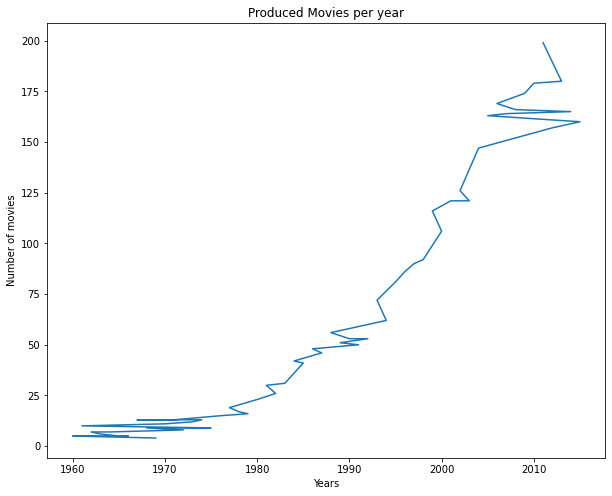

In [18]:
quantity = df["release_year"].value_counts()
quantity.plot.line(figsize=(10, 8))
plt.title("Produced Movies per year")
plt.xlabel("Years")
plt.ylabel("Number of movies")
plt.show()

> they do make more movies every year

 ### Is  budget  increase for  movies  every year  or they do more movies?

In [19]:
#get mean of budget movies that produce every year movies 

In [20]:
df2 = df.groupby('release_year').mean()

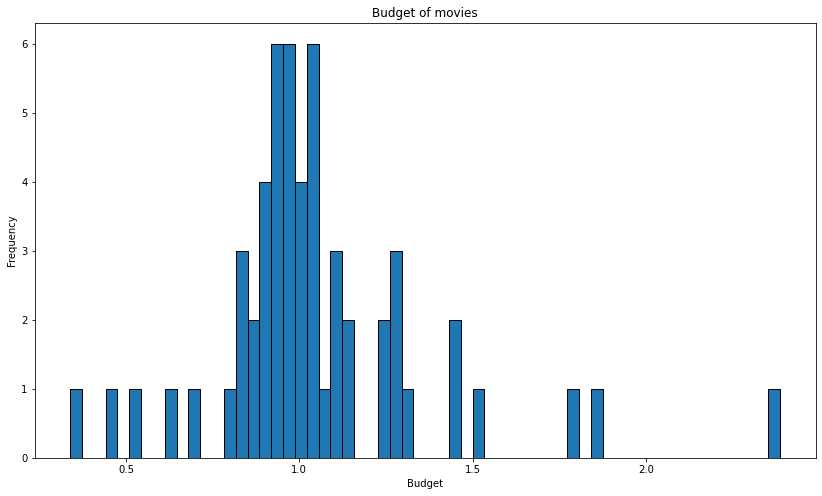

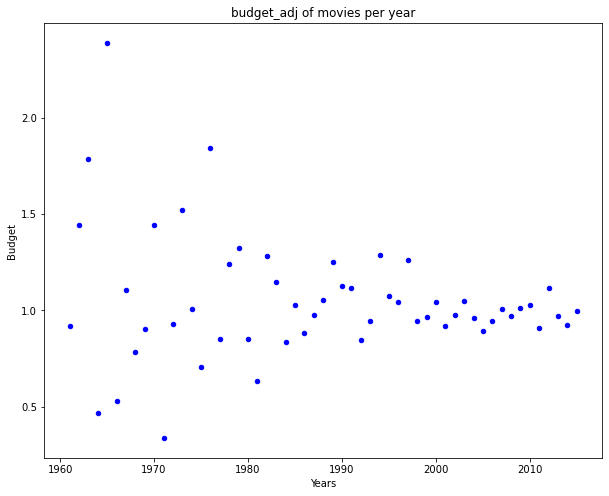

In [21]:
df3=df2['budget_adj'].div(df2["budget_adj"].shift(1)).reset_index()
visual_hist_plot(df3,"budget_adj","Budget of movies","Budget")
visual_scatter_plot(df3,"release_year","budget_adj","budget_adj of movies per year","Years","Budget")

> they make more movies with lower budget than past years

 ### Does Movies  get popular over time ?

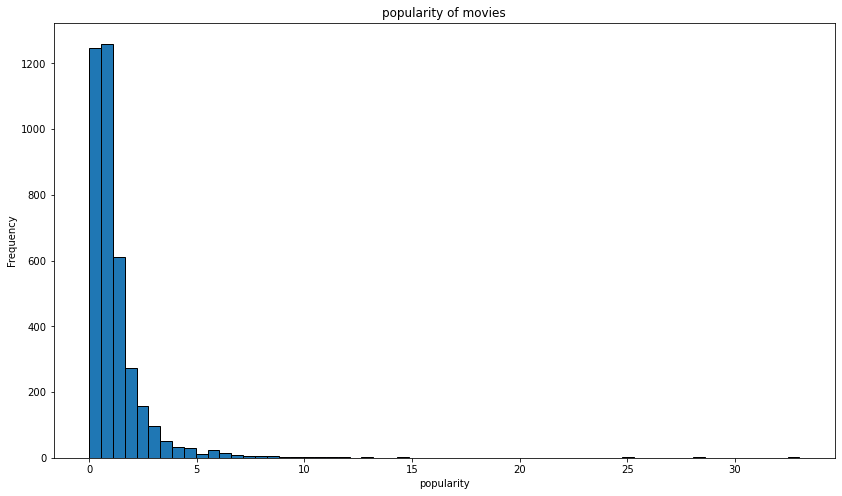

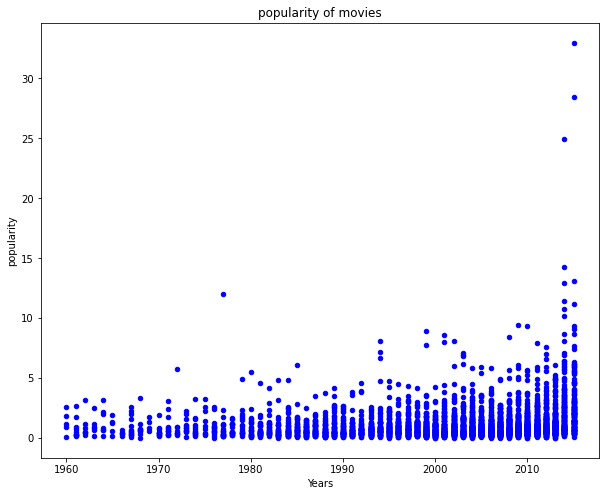

In [22]:
visual_hist_plot(df,"popularity","popularity of movies","popularity")
visual_scatter_plot(df,"release_year","popularity","popularity of movies","Years","popularity")

> Movies get popular over time 

<a id='limitations'></a>
# Limitations:

     1-if we know how much the crew paid that  the budget increase for actors get more or the preprations for it
    
     2-sample size too small 
     
     3-if we know the rate of the movie like (pg,pg-13,R) to know the the age of watchers

<a id='conclusions'></a>
# Conclusions:

    1-Budget of the movies increase every year as total because they make more movies but as solo movie the budget 
    decresed than before 
    
    2-Revenue of the movies increase every year as total because they make more movies and the popularty of the movies
    increased over time
    


In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295

# References

    http://pandas.pydata.org/docs/reference/

    
    Kaggle Kernels https://www.kaggle.com/tmdb/tmdb-movie-metadata

